In [19]:
#!pip install -r requirements.txt

## Intro
Hello code reviewers! Our code is not finalized yet - we will adjust data and graphs accordingly when we conduct further background research on our project and narrow down exactly what we want to study about Guatemala. For now we based off our code from the class example datahub code.

In [20]:
#Made new Guatemala data sheet with same information but with some extra sheets and with unit conversions
Guatemala_Data = '1x6A8fRQXzrdhzOV2UZTxzqhFfA-pt7T_sTmMNcQu_VQ'

In [21]:
import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets

# x is Food Expenditures sheet
x = read_sheets(Guatemala_Data,sheet='Food Expenditures')
x.columns.name = 'j'

# p is Food Prices (had to transpose due to issues with original food prices sheet)
p = read_sheets(Guatemala_Data,sheet='Transposed').set_index(['t','m'])
p.columns.name = 'j'

# d is Household Characteristics
d = read_sheets(Guatemala_Data,sheet="Household Characteristics")
d.columns.name = 'k'

# x may have duplicate columns
x = x.T.groupby('j').sum().T
x = x.replace(0,np.nan) # Replace zeros with missing

# Take logs of expenditures; call this y
y = np.log(x.set_index(['i','t','m']))

d.set_index(['i','t','m'],inplace=True)

/tmp/ipykernel_412/704976042.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x = x.replace(0,np.nan) # Replace zeros with missing


In [22]:
#This cell is to run a regression estimation to predict household expenditures

y = y.stack()

d = d.stack()

# Check that indices are in right places!
assert y.index.names == ['i','t','m','j']
assert d.index.names == ['i','t','m','k']

from cfe import Regression

result = Regression(y=y,d=d)

result.predicted_expenditures()

i     t     m              j             
1     2000  Metropolitana  Avocado             7.088698
                           Bananas            16.067197
                           Beans               9.494430
                           Beef              100.138098
                           Beef Entrails      13.948086
                                                ...    
7276  2000  Suroriente     Tostadas            9.664286
                           Water (bottle)     11.366774
                           Watermelon          7.872758
                           Wheat Flour         4.710398
                           Yucca               3.394201
Length: 515736, dtype: float64

<Axes: xlabel='yhat', ylabel='y'>

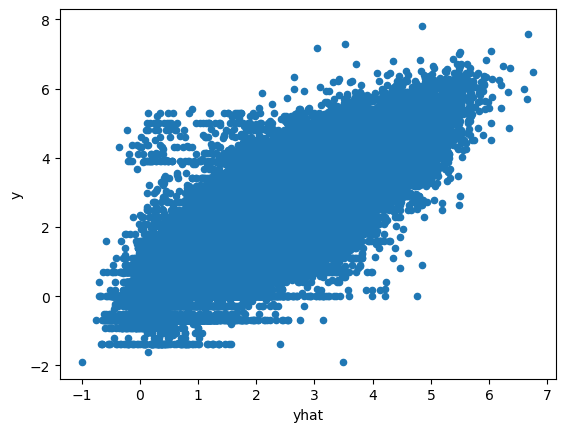

In [23]:
#This scatterplot compares predicted log expenditures (x-axis) with the true log expenditures (y-axis)

%matplotlib inline
df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

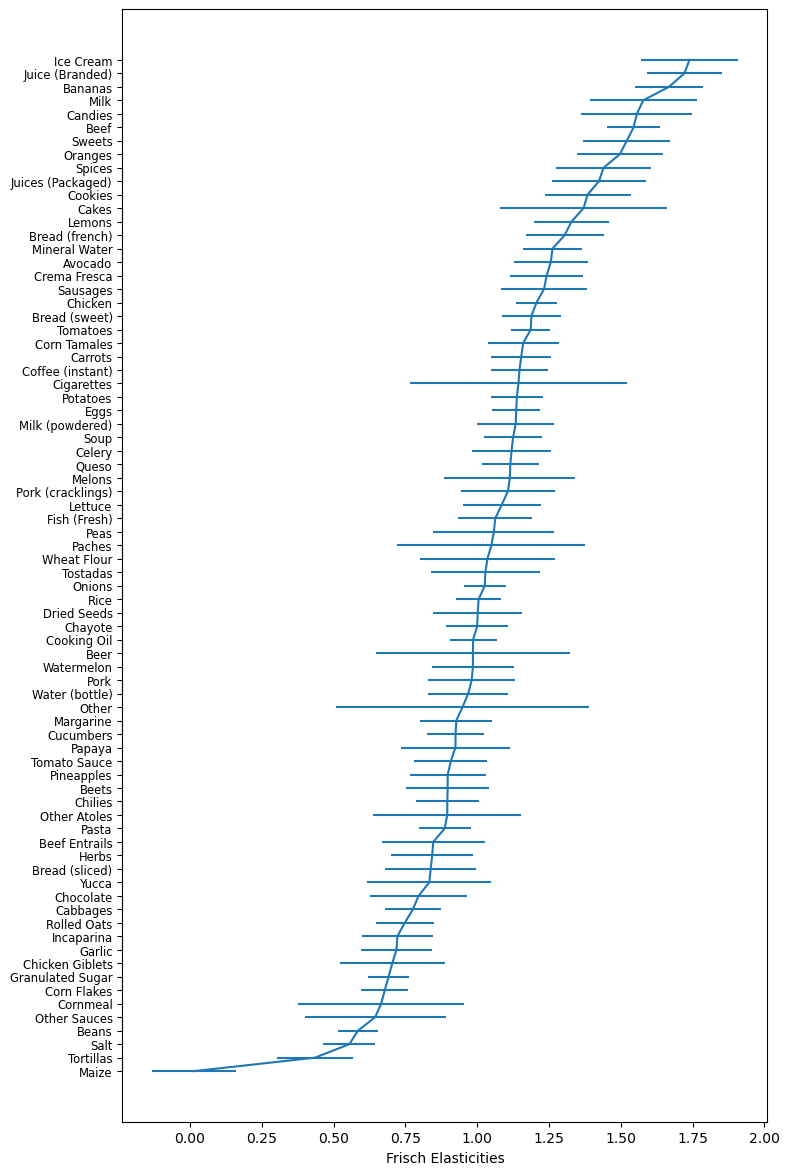

In [24]:
# This graph shows the different income elasticities of each good with confidence intervals

ax = result.graph_beta()

In [25]:
# This table illustrates the effect of household composition on demand
result.get_gamma()

k,Males 00-03,Females 00-03,Males 04-08,Females 04-08,Males 09-13,Females 09-13,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,Constant
j,,,,,,,,,,,,,,,
Avocado,-0.088275,-0.122866,-0.027481,-0.049743,-0.011544,-0.028603,0.027512,0.000261,0.074529,0.161430,0.158562,0.298749,0.062668,0.063345,1.749162
Bananas,-0.115450,-0.145996,-0.055901,-0.048553,-0.030538,-0.031087,0.020161,0.029274,0.102862,0.200082,0.145734,0.281083,-0.011023,0.132700,2.601493
Beans,0.084385,0.060966,0.117293,0.090192,0.149595,0.105575,0.223101,0.136226,0.151246,0.094017,0.155123,0.098994,0.194210,0.128332,2.569973
Beef,-0.137689,-0.105542,-0.045396,-0.034741,-0.001552,-0.011293,0.048299,0.052845,0.159855,0.250684,0.237983,0.286949,0.059454,0.062816,4.194728
Beef Entrails,0.029093,-0.043311,-0.049139,0.016524,0.048557,0.067730,0.018645,0.094059,0.023180,0.163656,0.100741,0.096734,0.027478,0.029255,2.603261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tostadas,-0.104827,0.018316,-0.005392,0.065595,0.131417,0.026776,0.139571,0.060413,0.036817,0.108625,0.102481,0.105183,-0.017120,0.048025,2.129704
Water (bottle),-0.015467,-0.028098,-0.010616,-0.027088,-0.101461,-0.020004,-0.031444,0.001428,0.060548,0.050409,0.129648,0.256980,0.022353,0.138386,2.741034
Watermelon,0.024007,-0.021794,0.025018,-0.042928,-0.005028,0.076032,0.022955,0.081937,0.061462,0.124539,0.066374,0.153493,-0.003809,-0.024234,1.949779


<Axes: ylabel='Density'>

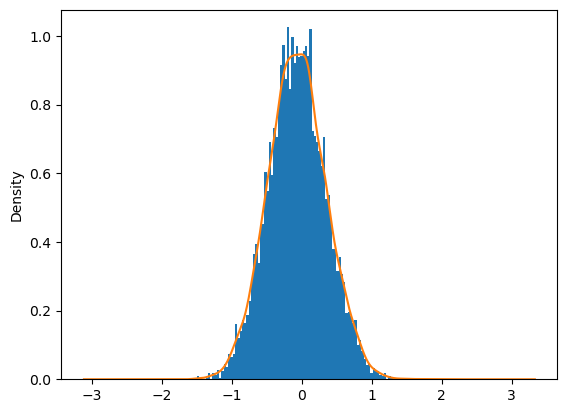

In [26]:
#This histogram illustrates the distribution of welfare measure of households
ax = result.get_w().plot.hist(bins=100,density=True)
result.get_w().plot.kde(ax=ax)

In [27]:
# This finds the food budget for all households and determines the median food budget

import numpy as np

xhat = result.predicted_expenditures()

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
xref = xbar.quantile(0.5)  # Household at 0.5 quantile is median

In [28]:
# This chooses a reference price for avocados

# Reference prices chosen from a particular time; average across place.
# These are prices per kilogram:
pbar = p.mean()
pbar = pbar[result.beta.index] # Only use prices for goods we can estimate

#Finally, define a function to change a single price in the vector $p$:
def my_prices(p0,p=pbar,j='Avocado'):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p

Text(0.5, 0, 'Quantities of Avocado Demanded')

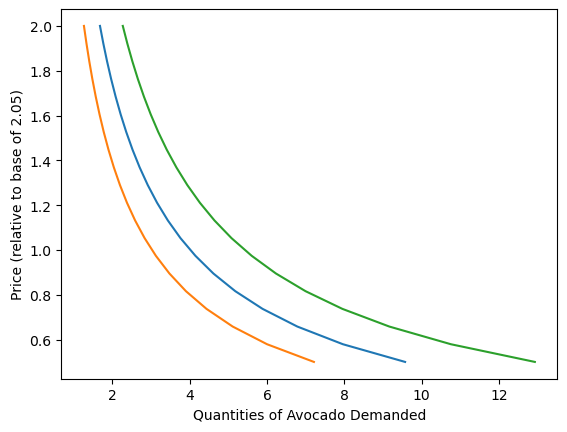

In [29]:
#This graph shows the demand curves of households for avocado at different budgets

import matplotlib.pyplot as plt
%matplotlib inline

use = 'Avocado'  # Good we want demand curve for

# Vary prices from 50% to 200% of reference.
scale = np.linspace(.5,2,20)

# Demand for Avocado for household at median budget
plt.plot([result.demands(xref,my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

# Demand for Avocado for household at 25% percentile
plt.plot([result.demands(xbar.quantile(0.25),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

# Demand for Avocado for household at 75% percentile
plt.plot([result.demands(xbar.quantile(0.75),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")

In [30]:
#Getting dataframes for calculating nutrition

#Guatemala
InputFiles = {'Expenditures':('1x6A8fRQXzrdhzOV2UZTxzqhFfA-pt7T_sTmMNcQu_VQ','Food Expenditures'),
              'Prices':('1x6A8fRQXzrdhzOV2UZTxzqhFfA-pt7T_sTmMNcQu_VQ','Transposed'),
              'HH Characteristics':('1x6A8fRQXzrdhzOV2UZTxzqhFfA-pt7T_sTmMNcQu_VQ','Household Characteristics'),
              'FCT':('1x6A8fRQXzrdhzOV2UZTxzqhFfA-pt7T_sTmMNcQu_VQ','FCT'),
              'RDI':('1x6A8fRQXzrdhzOV2UZTxzqhFfA-pt7T_sTmMNcQu_VQ','RDI'),}
from eep153_tools.sheets import read_sheets
import numpy as np
import pandas as pd

def get_clean_sheet(key,sheet=None):

    df = read_sheets(key,sheet=sheet)
    df.columns = [c.strip() for c in df.columns.tolist()]

    df = df.loc[:,~df.columns.duplicated(keep='first')]   

    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

    df = df.loc[~df.index.duplicated(), :]

    return df

# Get expenditures...
x = get_clean_sheet(InputFiles['Expenditures'][0],
                    sheet=InputFiles['Expenditures'][1])

if 'm' not in x.columns:
    x['m'] = 1

x = x.set_index(['i','t','m'])
x.columns.name = 'j'

x = x.apply(lambda x: pd.to_numeric(x,errors='coerce'))
x = x.replace(0,np.nan)

# Get HH characteristics...
z = get_clean_sheet(InputFiles['HH Characteristics'][0],
                    sheet=InputFiles['HH Characteristics'][1])

if 'm' not in z.columns:
    z['m'] = 1

z = z.set_index(['i','t','m'])
z.columns.name = 'k'

z = z.apply(lambda x: pd.to_numeric(x,errors='coerce'))

# Get prices
p = get_clean_sheet(InputFiles['Prices'][0],
                    sheet=InputFiles['Prices'][1])

if 'm' not in p.columns:  # Supply "market" indicator if missing
    p['m'] = 1

p = p.set_index(['t','m'])
p.columns.name = 'j'

p = p.apply(lambda x: pd.to_numeric(x,errors='coerce'))
p = p.replace(0,np.nan)

fct = get_clean_sheet(InputFiles['FCT'][0],
                    sheet=InputFiles['FCT'][1])

#### This bit peculiar to Niger FCT #####
#fct = fct.loc[fct.Code.str.len()==6]
#fct = fct.set_index('Code')
#fct.columns = [v.replace('\n',' ') for v in fct.columns]
########################################
fct = fct.set_index('j')
fct.columns.name = 'n'

fct = fct.apply(lambda x: pd.to_numeric(x,errors='coerce'))

################## RDI, if available (consider using US) #####################
rdi = get_clean_sheet(InputFiles['RDI'][0],
                    sheet=InputFiles['RDI'][1])
rdi = rdi.set_index('n')
rdi.columns.name = 'k'

In [31]:
#Another regression of the same as above, save as persistent

import cfe

result = cfe.Regression(y=np.log(x.stack()),d=z)

#result.get_beta().sort_values(ascending=False)
result.to_pickle('./foo.pickle')

In [32]:
#Divide by prices to map to FCT, then map predicted quantities on to nutrients

import cfe

result = cfe.read_pickle('foo.pickle')  # Get persistent result saved above...

xhat = result.predicted_expenditures()

# Expenditures divided by prices/kg gives quantities in kgs...
qhat = (xhat.unstack('j')/p).dropna(how='all')

# Drop missing columns
qhat = qhat.loc[:,qhat.count()>0]

use = fct.index.intersection(qhat.columns)


nutrients = qhat[use]@fct.loc[use,:]
#nutrients.mean()   Nutrients are for past /week/ for entire household. (Depends on dataset)

In [33]:
#Using Ugandan RDI, so changing to weekly. Table shows the ratio of nutritional adequacy for each nutrient

z = z[rdi.columns.tolist()]

hh_rdi = z@rdi.T

# Uganda data is per week, so make this a recommended WEEKLY intake:
hh_rwi = hh_rdi*7
#hh_rwi

# Match up nutrient names
use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

nutrient_ratio = (nutrients[use_nutrients].fillna(0)/hh_rwi[use_nutrients]).dropna()

nutrient_ratio

,,n,Energy,Protein,Carbohydrate,Fiber,Folate,Calcium,Phosphorus,Iron,Thiamin,Niacin,Vitamin C,Vitamin A,Potassium,Zinc,Magnesium,Vitamin B-6,Vitamin B-12
i,t,m,,,,,,,,,,,,,,,,,
1,2000,Metropolitana,1.712667,2.052554,5.028132,0.155105,0.005256,1.650403,3.721219,4.719113,2.561711,2.966965,1.844303,1.883820,0.108779,1.585092,0.0,0.819659,1.623630
2,2000,Metropolitana,2.392710,2.333301,7.442732,0.246129,0.006700,2.129042,4.966639,11.247074,3.268120,3.677061,2.285763,2.313600,0.161367,1.893070,0.0,0.941300,2.215186
3,2000,Metropolitana,2.098590,2.377207,6.906588,0.176808,0.006471,1.886089,3.778462,8.289170,2.975505,3.369918,2.117537,1.883169,0.134524,1.447487,0.0,0.938126,1.857608
5,2000,Metropolitana,2.763013,3.288577,7.994431,0.311775,0.008850,2.420283,5.765953,8.282512,4.521995,5.097198,3.637572,3.415323,0.206433,2.725290,0.0,1.696454,3.269180
6,2000,Metropolitana,2.324709,2.737318,5.430151,0.215564,0.006412,1.694268,3.606881,5.899500,3.197653,3.690649,2.604599,2.468241,0.132558,2.131929,0.0,0.932618,1.912724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7271,2000,Suroriente,1.213966,1.751093,3.061358,0.094319,0.004046,0.981914,2.647512,3.413398,1.868419,2.124715,1.262925,1.310896,0.065680,1.084849,0.0,0.568200,1.080298
7272,2000,Suroriente,4.655834,4.340980,12.071165,0.463269,0.010969,3.056032,8.008277,18.469437,5.744504,6.707543,4.548796,4.608206,0.252808,3.895447,0.0,1.599218,3.687373
7273,2000,Suroriente,2.519202,3.603342,6.438027,0.293751,0.009013,2.110757,5.175868,7.595358,4.407632,5.060591,4.395744,3.508290,0.241198,2.980962,0.0,1.612424,2.857285


<Axes: >

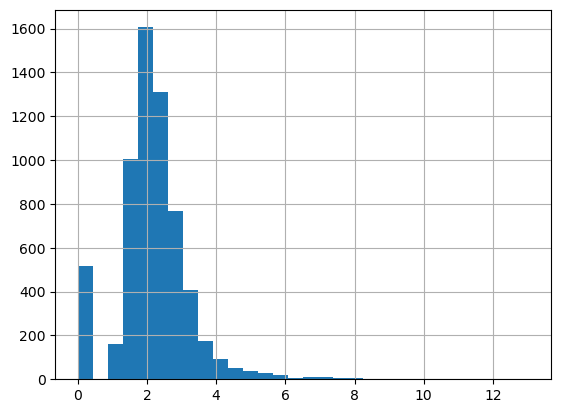

In [34]:
#This histogram shows the distribution of adequate protein consumption for households

%matplotlib inline
nutrient_ratio['Protein'].hist(bins=30)

In [35]:
#Finally, this result means that the average household is 9% likely to underconsume energy

((nutrient_ratio['Energy']) < 1).mean()

0.09029454369869629